In [21]:
from newsapi import NewsApiClient
import datetime as dt
import pandas as pd
from pandas import DataFrame
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from collections import Counter
from nltk.stem import WordNetLemmatizer
import tweepy
from textblob import TextBlob
from datetime import datetime
import numpy as np

newsapi = NewsApiClient(api_key = '127ac9edf9da4a56bbce2c6ff98978c4')
pd.options.display.max_colwidth = 8000
lemmatizer = WordNetLemmatizer()

consumerKey = "jfAlL4ZYSvAcLZjIghNjkPVef"
consumerSecret = "E2Wd7Fc9kQhMC4x9bTbyo8IzyDOjH7gkgXc5ZzHKBv1na0JdCB"
accessToken = "1168827517387468800-sqEsr4vVHF4ZQ0BnfyFCqTaK4H17gr"
accessTokenSecret = "FTFWWelxrVTBlwfWsHSIMe4jKI5ikzkhdZ5QcsKuCNxUS"

authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)

#calling api
api = tweepy.API(authenticate, wait_on_rate_limit = True)


In [65]:
# All the functions for NewsAPI 

#this is the list of sources that news API can scrapte the news from
# this is for the dropdown in UI that lets lisa choose the news source

def get_sources():
    sources = {'source':  ['associated-press', 'australian-financial-review', 'bbc-news' , 'bloomberg', 'breitbart-news', 'business-insider',
                       'cnn', 'cbc-news', 'financial-post', 'fortune', 'google-news-uk', 'reuters', 'the-huffington-post', 'the-wall-street-journal', 'the-washington-post', 
                        'time', 'usa-today' ] , 'source name':  ['Associated Press', 'Australian Financial Review', 'BBC News' , 'Bloomberg', 'Breitbart News', 'Business Insider', 
                       'CNN', 'CBC News ', 'Financial Post', 'Fortune', 'Google News UK', 'Reuters', 'The Huffington Post', 'The Wall Street Journal', 'The Washington Post', 
                        'Time', 'USA Today' ]}
    df = pd.DataFrame(sources, columns = ['source', 'source name' ])
    
    return df


def preprocessing (text):
    stopwords = nltk.corpus.stopwords.words('english')
    another = "idk,amp,&amp,aboard,about,above,accordance,back,according,across,after,against,ahead,along,alongside,also,although,amid,amidst,among,amongst,and,anent,anti,apart,around,as,aside,astride,at,athwart,atop,barring,because,before,behalf,behind,behither,below,beneath,beside,besides,between,betwixt,beyond,both,but,by,cum,despite,down,due,during,either,ere,even,except,far,following,for,fornenst,fornent,from,front,given,if,in,including,inside,instead,into,lest,lieu,like,means,near,neither,next,nor,notwithstanding,of,off,on,once,only,onto,or,out,outside,outwith,over,owing,per,point,prior,pro,qua,re,regard,regarding,regardless,regards,respect,sans,save,since,so,soon,subsequent,than,thanks,that,though,through,throughout,till,times,to,top,toward,towards,under,underneath,unless,unlike,until,unto,up,upon,versus,via,vice,vis-à-vis,well,when,whenever,where,wherever,whether,while,with,within,without,worth,yet,a,able,all,almost,am,an,any,are,aren't,arent,be,been,can,cannot,could,dear,did,didn't,didnt,do,don't,dont,does,doesn't,doesnt,else,ever,every,get,got,had,has,have,he,her,hers,him,his,how,however,i,is,it,its,just,least,let,likely,may,me,might,most,must,my,no,not,often,other,our,own,rather,said,say,says,she,should,shouldn't,shouldnt,some,the,their,them,then,there,these,they,this,tis,too,twas,us ,was,wasn't,wasnt,we,were,weren't,werent,what,which,who,whom,why,will,would,you,your,a's,accordingly,actually,afterwards,again,ain't,allow,allows,alone,already,always,another,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,away,beforehand,being,c'mon,c's,came,can't,cant,co,com,come,comes,concerning,consequently,corresponding,couldn't,currently,definitely,described,doing,done,downwards,each,edu,eg,eight,elsewhere,enough,entirely,especially,et,etc,everybody,everyone,everything,everywhere,ex,exactly,example,few,fifth,first,five,followed,follows,former,formerly,forth,four,further,furthermore,gets,getting,gives,go,goes,going,gone,gotten,hadn't,happens,hardly,hasn't,haven't,having,he's,hello,help,hence,here,here's,hereafter,hereby,herein,hereupon,herself,hi,himself,hither,hopefully,howbeit,i'd,i'll,i'm,i've,ie,ignored,immediate,inasmuch,inc,indeed,insofar,inward,isn't,it'd,it'll,it's,itself,last,lately,later,latter,latterly,less,let's,liked,ltd,mainly,many,maybe,mean,meanwhile,merely,more,moreover,mostly,much,myself,name,namely,nd,nearly,need,needs,never,nevertheless,new,nine,nobody,non,none,noone,normally,nothing,now,nowhere,obviously,oh,ok,okay,old,one,ones,others,otherwise,ought,ours,ourselves,overall,perhaps,placed,please,possible,presumably,probably,provides,que,quite,qv,rd,really,reasonably,relatively,respectively,right,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,seriously,several,shall,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,sorry,still,sub,such,sup,t's,tends,th,thank,thanx,that's,thats,theirs,themselves,thence,there's,thereafter,thereby,therefore,therein,theres,thereupon,they'd,they'll,they're,they've,think,third,thorough,thoroughly,those,three,thru,thus,together,took,tried,tries,truly,try,trying,twice,two,un,unlikely,usually,very,viz,vs,want,way,we'd,we'll,we're,we've,welcome,went,what's,whatever,whence,where's,whereafter,whereas,whereby,wherein,whereupon,whither,who's,whoever,whole,whose,won't,wonder,wouldn't,yes,you'd,you'll,you're,you've,yours,yourself,yourselves,reuters,ap,e.g, etc, greetings,h,i.e.,inner,j,k,l,m,mr.,ms.,n,o,p,r,s,t,u,uucp,v,w,x,y,z,.com,.ly,.net,.org,aahh,aarrgghh,abt,ftl,ftw,fu,fuck,fucks,gtfo,gtg,haa,hah,hahah,haha,hahaha,hahahaha,hehe,heh,hehehe,hihi,hihihi,http,https,huge,huh,huhu,huhuhu,iirc,im,imho,imo,ini,irl,ish,isn,isnt,j/k,jk,jus,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,leavg,leh,lol,lols,mph,mrt,msg,msgs,muahahahahaha,nb,neways,ni,nice,pls,plz,plzz,psd,pte,pwm,pwned,qfmft,qft,tm,tmr,tyty,tyvm,um,umm,viv,vn,wa,wadever,wah,wasn,wassup,wat,watcha,wateva,watever,watnot,wats,wayy,wb,weren,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,win,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,yeh,yhoo,ymmv,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,loz,lor,loh,tsk,meh,lmao,wanna,doesn,liao,didn,omg,ohh,ohgod,hoh,hoo,bye,byee,byeee,byeeee,lmaolmao,yeahhh,yeahhhh,yeahhhhh,yup,yupp,hahahahahahaha,hahahahahah,hahhaha,wooohoooo,wahaha,haah,2moro,veh,noo,nooo,noooo,hahas,ooooo,ahahaha,ahahahahah,tomolow,ads,afaik,aft,ago,ain,aint,alot,anycase,anymore,app,apparently,apps,argh,ass,asses,babeh,bai,based,bcos,bcoz,bday,bit,biz,blah,bleh,bro,bros,btw,congrats,contd,conv,cos,couldn,couldnt,coz,crap,curnews,curr,cuz,dat,de,diff,dis,doc,don,dr,dreamt,drs,dun,dunno,duper,eh,ehh,emo,emos,eng,esp,fadein,ffs,fml,frm,fwah,g2g,gajshost,gd,geez,gg,gigs,hasn,hasnt,hav,haven,havent,hee,hey,hmm,ho,hohoho,info,issued,lawl,lfg,lfm,ll,lmfao,lnks,lotsa,lotta,luv,ly,macdailynews,neato,nite,nom,noscript,nvr,nw,ohayo,omfg,omfgwtf,omgwtfbbq,omw,org,pf,pic,pm,pmsing,ppl,pre,rawr,rawrr,rofl,roflmao,rss,rt,sec,secs,sgreinfo,shd,shit,shits,shitz,shld,shouldn,shudder,sq,sqft,sqm,srsly,stfu,stks,su,sux,swf,tat,tgif,thanky,thk,thks,tht,ttyl,ty,tym,tyme,typed,va,var,vc,ve,web,fucking,mrs,mr,ehhh,lot,lots,html,net,hahahahahahahahaha,hahahahaha,hahahahah,zzzzz,#teamfollowback,#teamfollow,#follow,#autofollow,#followgain,#followbackk,#teamautofollow,#followme,#ifollow,#followngain,#followback,#followfriday,#ifollowback,#200aday,#500aday,#1000aday,hahahahha,lolololol,lololol,lolol,dude,hmmm,humm,tumblr,kkkk,fk,yayyyyyy,fffffffuuuuuuuuuuuu,zzzz,noooooooooo,hahahhaha,woohoo,lalalalalalala,lala,lalala,lalalala,whahahaahahahahahah,gimme,gonna,gotta,grats,gratz,happen,happened,nowadays,phew,post,posted,posts,tweet,tweets,#ff,#f4f,#instantfollowback,#autofollowback,#instantfollow"
    additional = another.split(",")
    stopwords += additional 

    tokens = re.split('\W+', text)
    text = [lemmatizer.lemmatize(word) for word in tokens]
    result = [word for word in tokens if word not in stopwords]       
    return result



# retrieve the articles based on specified query and source, will return 15 results and the sentiment
def news_get_everything (query, source):
    
    data = newsapi.get_everything(q = query, sources = source, language = 'en', sort_by = 'relevancy' , page_size = 15) 
    df = pd.DataFrame(data['articles'])    
    df['clean_description'] =  df['description'].apply(lambda x: preprocessing(x.lower())) 
    
    senti_score = []
    result = []
    
    for index, row in df.iterrows():
        
        published_at = row['publishedAt'].split('T')[0]
        row['publishedAt'] = published_at.replace("-", "/")
         
        analyzer = SentimentIntensityAnalyzer()
        vs = analyzer.polarity_scores(row['description'])  # use description column to do sentiment analysis
        compound = vs.get('compound') 
        senti_score.append(compound) 
        
        if compound >= 0.5:
            result.append('Positive')
        elif compound > -0.5 and compound < 0.5:
            result.append('Neutral')
        else:
            result.append('Negative')    
            
    df['sentiment'] = result
    
    df['date'] = df['publishedAt']
   
    return df


def news_overallsentiment(df):
    
    #get the percentage of positive tweets
    postnews = df[df.sentiment == 'Positive']
    postnews = postnews['description']
    postnews
    
    # get the percentage of negative tweets
    negnews = df[df.sentiment == 'Negative']
    negnews = negnews['description']
    
    #get the percentage of neutral tweets
    neunews = df[df.sentiment == 'Neutral']
    neunews = neunews['description']
    
    articles = {'Sentiment': ['Positive','Negative','Neutral'],
        'Overall Score': [round((postnews.shape[0] / df.shape[0]) *100, 1),round( (negnews.shape[0] / df.shape[0] * 100) , 1), round( (neunews.shape[0] / df.shape[0] * 100) , 1)]
        }
    df = pd.DataFrame(articles, columns = ['Sentiment', 'Overall Score'])
    
    
    return df

# for bar chart words and its count
def news_top_mentioned(df,query):
    word_list = []
    for index, rows in df.iterrows():
        for each_word in rows.clean_description:            
            if len(each_word) > 3 and each_word != query:      
                word_list.append(each_word)  

    counts = dict()
    for word in word_list:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1           

    df = pd.DataFrame(list(counts.items()),columns = ['word','count'])     
    df = df.sort_values(['count'], ascending=[False])[0:10]
   
    
    return df

from scipy.misc.pilutil import imread
from PIL import Image

# for wordcloud
def news_create_wordcloud(df, query):    
    word_list = []
    for index, rows in df.iterrows():
        for each_word in rows.clean_description:
            if len(each_word) > 3 and each_word != query:
                word_list.append(each_word)
                
    image = Image.open("circle_wordcloud.png")
    mask = np.array(image)
#     logomask = imread('circle_wordcloud.png')    
    words_joined = " ".join([w for w in word_list])
    my_wordcloud = WordCloud(background_color='white', mask = mask, width=1800, height=1400).generate(words_joined)

    plt.imshow(my_wordcloud)    
    plt.axis('off')
    plt.show()


In [ ]:
# http://www.shapecollage.com/shapes/mask-circle.png

In [6]:
#All the functions for Twitter
#clean_txt function is for sentiment analysis. it only removes basic stop words


def partial_clean(text):  

  
   
#     text = re.sub(r'@[A-Za-z0-9]+', '', text) #removed @mentions
#     text = re.sub(r'#', '', text) #removing the # symbols
#     text = ''.join([i for i in text if not i.isdigit()]) #removing digits
    text = re.sub(r'RT[\s]+', '',  text) # removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link
    text = text.replace('\n','')
#     text = text.lower() # lowercase
#     text =  ' '.join(word.strip(string.punctuation) for word in text.split()) #remove punctuations
#     tokens = re.split('\W+', text) 
#     text = ' '.join(word for word in tokens if word not in stopwords) #remove stopwords    
    
    return text




def clean_txt(text):
    
    stopwords = nltk.corpus.stopwords.words('english') 
  
   
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removed @mentions
    text = re.sub(r'#', '', text) #removing the # symbols
    text = ''.join([i for i in text if not i.isdigit()]) #removing digits
    text = re.sub(r'RT[\s]+', '',  text) # removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link
    text = re.sub(r'\n[\s]+', '',  text) # removing \n
    text = text.lower() # lowercase
    text =  ' '.join(word.strip(string.punctuation) for word in text.split()) #remove punctuations
    tokens = re.split('\W+', text) 
    text = ' '.join(word for word in tokens if word not in stopwords) #remove stopwords    
    
    return text



#clean_txt_list function is for topwords and wordcloud. It lemmatizes and removes a lot of stop words

def clean_txt_list(text):
    
    stopwords = nltk.corpus.stopwords.words('english')
    another = "idk,amp,&amp,aboard,kindly,about,above,accordance,according,across,magsafe,amp,twitter,back,after,against,ahead,along,alongside,also,although,amid,amidst,neck, use, uses, using, saying, says, said, among,amongst,and,anent,anti,apart,around,as,aside,astride,at,athwart,atop,barring,because,before,behalf,behind,behither,below,beneath,beside,besides,between,betwixt,beyond,both,but,by,cum,despite,down,due,during,either,ere,even,except,far,following,for,fornenst,fornent,from,front,given,if,in,including,inside,instead,into,lest,lieu,like,means,near,neither,next,nor,notwithstanding,of,off,on,once,only,onto,or,out,outside,outwith,over,owing,per,point,prior,pro,qua,re,regard,regarding,regardless,regards,respect,sans,save,since,so,soon,subsequent,than,thanks,that,though,through,throughout,till,times,to,top,toward,towards,under,underneath,unless,unlike,until,unto,up,upon,versus,via,vice,vis-à-vis,well,when,whenever,where,wherever,whether,while,with,within,without,worth,yet,a,able,all,almost,am,an,any,are,aren't,arent,be,been,can,cannot,could,dear,did,didn't,didnt,do,don't,dont,does,doesn't,doesnt,else,ever,every,get,got,had,has,have,he,her,hers,him,his,how,however,i,is,it,its,just,least,let,likely,may,me,might,most,must,my,no,not,often,other,our,own,rather,said,say,says,she,should,shouldn't,shouldnt,some,the,their,them,then,there,these,they,this,tis,too,twas,us ,was,wasn't,wasnt,we,were,weren't,werent,what,which,who,whom,why,will,would,you,your,a's,accordingly,actually,afterwards,again,ain't,allow,allows,alone,already,always,another,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,away,beforehand,being,c'mon,c's,came,can't,cant,co,com,come,comes,concerning,consequently,corresponding,couldn't,currently,definitely,described,doing,done,downwards,each,edu,eg,eight,elsewhere,enough,entirely,especially,et,etc,everybody,everyone,everything,everywhere,ex,exactly,example,few,fifth,first,five,followed,follows,former,formerly,forth,four,further,furthermore,gets,getting,gives,go,goes,going,gone,gotten,hadn't,happens,hardly,hasn't,haven't,having,he's,hello,help,hence,here,here's,hereafter,hereby,herein,hereupon,herself,hi,himself,hither,hopefully,howbeit,i'd,i'll,i'm,i've,ie,ignored,immediate,inasmuch,inc,indeed,insofar,inward,isn't,it'd,it'll,it's,itself,last,lately,later,latter,latterly,less,let's,liked,ltd,mainly,many,maybe,mean,meanwhile,merely,more,moreover,mostly,much,myself,name,namely,nd,nearly,need,needs,never,nevertheless,new,nine,nobody,non,none,noone,normally,nothing,now,nowhere,obviously,oh,ok,okay,old,one,ones,others,otherwise,ought,ours,ourselves,overall,perhaps,placed,please,possible,presumably,probably,provides,que,quite,qv,rd,really,reasonably,relatively,respectively,right,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,seriously,several,shall,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,sorry,still,sub,such,sup,t's,tends,th,thank,thanx,that's,thats,theirs,themselves,thence,there's,thereafter,thereby,therefore,therein,theres,thereupon,they'd,they'll,they're,they've,think,third,thorough,thoroughly,those,three,thru,thus,together,took,tried,tries,truly,try,trying,twice,two,un,unlikely,usually,very,viz,vs,want,way,we'd,we'll,we're,we've,welcome,went,what's,whatever,whence,where's,whereafter,whereas,whereby,wherein,whereupon,whither,who's,whoever,whole,whose,won't,wonder,wouldn't,yes,you'd,you'll,you're,you've,yours,yourself,yourselves,reuters,ap,e.g, etc, greetings,h,i.e.,inner,j,k,l,m,mr.,ms.,n,o,p,r,s,t,u,uucp,v,w,x,y,z,.com,.ly,.net,.org,aahh,aarrgghh,abt,ftl,ftw,fu,fuck,fucks,gtfo,gtg,haa,hah,hahah,haha,hahaha,hahahaha,hehe,heh,hehehe,hihi,hihihi,http,https,huge,huh,huhu,huhuhu,iirc,im,imho,imo,ini,irl,ish,isn,isnt,j/k,jk,jus,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,leavg,leh,lol,lols,mph,mrt,msg,msgs,muahahahahaha,nb,neways,ni,nice,pls,plz,plzz,psd,pte,pwm,pwned,qfmft,qft,tm,tmr,tyty,tyvm,um,umm,viv,vn,wa,wadever,wah,wasn,wassup,wat,watcha,wateva,watever,watnot,wats,wayy,wb,weren,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,win,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,yeh,yhoo,ymmv,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,loz,lor,loh,tsk,meh,lmao,wanna,doesn,liao,didn,omg,ohh,ohgod,hoh,hoo,bye,byee,byeee,byeeee,lmaolmao,yeahhh,yeahhhh,yeahhhhh,yup,yupp,hahahahahahaha,hahahahahah,hahhaha,wooohoooo,wahaha,haah,2moro,veh,noo,nooo,noooo,hahas,ooooo,ahahaha,ahahahahah,tomolow,ads,afaik,aft,ago,ain,aint,alot,anycase,anymore,app,apparently,apps,argh,ass,asses,babeh,bai,based,bcos,bcoz,bday,bit,biz,blah,bleh,bro,bros,btw,congrats,contd,conv,cos,couldn,couldnt,coz,crap,curnews,curr,cuz,dat,de,diff,dis,doc,don,dr,dreamt,drs,dun,dunno,duper,eh,ehh,emo,emos,eng,esp,fadein,ffs,fml,frm,fwah,g2g,gajshost,gd,geez,gg,gigs,hasn,hasnt,hav,haven,havent,hee,hey,hmm,ho,hohoho,info,issued,lawl,lfg,lfm,ll,lmfao,lnks,lotsa,lotta,luv,ly,macdailynews,neato,nite,nom,noscript,nvr,nw,ohayo,omfg,omfgwtf,omgwtfbbq,omw,org,pf,pic,pm,pmsing,ppl,pre,rawr,rawrr,rofl,roflmao,rss,rt,sec,secs,sgreinfo,shd,shit,shits,shitz,shld,shouldn,shudder,sq,sqft,sqm,srsly,stfu,stks,su,sux,swf,tat,tgif,thanky,thk,thks,tht,ttyl,ty,tym,tyme,typed,va,var,vc,ve,web,fucking,mrs,mr,ehhh,lot,lots,html,net,hahahahahahahahaha,hahahahaha,hahahahah,zzzzz,#teamfollowback,#teamfollow,#follow,#autofollow,#followgain,#followbackk,#teamautofollow,#followme,#ifollow,#followngain,#followback,#followfriday,#ifollowback,#200aday,#500aday,#1000aday,hahahahha,lolololol,lololol,lolol,dude,hmmm,humm,tumblr,kkkk,fk,yayyyyyy,fffffffuuuuuuuuuuuu,zzzz,noooooooooo,hahahhaha,woohoo,lalalalalalala,lala,lalala,lalalala,whahahaahahahahahah,gimme,gonna,gotta,grats,gratz,happen,happened,nowadays,phew,post,posted,posts,tweet,tweets,#ff,#f4f,#instantfollowback,#autofollowback,#instantfollow"
    additional = another.split(",")
    stopwords += additional 
   
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removed @mentions
    text = re.sub(r'#', '', text) #removing the # symbols
    text = re.sub(r'RT[\s]+', '',  text) # removing RT
    text = re.sub(r'\n[\s]+', '',  text) # removing \n
    text = ''.join([i for i in text if not i.isdigit()]) #removing digits
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link
    text = text.lower() # lowercase
    text =  ' '.join(word.strip(string.punctuation) for word in text.split()) #remove punctuations
    tokens = re.split('\W+', text)
    text = [lemmatizer.lemmatize(word) for word in tokens]
    text = [word for word in text if word not in stopwords] #remove stopwords 

    
    return text


def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
# to retrive tweets from twitter api
def tweet_search(query, resulttype):
    
    tweets_search = tweepy.Cursor(api.search, q = query, lang = 'en' , result_type = resulttype, tweet_mode='extended').items(15)
    tweets_list = []
    url_list = []
    date_list = []


    for tweet in tweets_search:
        tweets_list.append(tweet.full_text) 
        date = tweet.created_at.strftime("%Y/%m/%d")
        date_list.append(date)
        
        url = f"https://twitter.com/{tweet.user.screen_name}/status/{tweet.id}"
        url_list.append(url)
        
#     for tweet in tweets_list:
#         urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tweet)
#         if urls == []:
#             temp_url.append("https://twitter.com/home")
#         else:
#             temp_url.append(urls[0])

    data = {'Tweets': tweets_list, 'URL': url_list, 'Date': date_list}

    df = pd.DataFrame(data) 
    
    df['Tweets'] = df['Tweets'].apply(partial_clean)
    df['Cleaned'] = df['Tweets'].apply(clean_txt)
    df['CleanedList'] = df['Tweets'].apply(clean_txt_list)    
    df['Subjectivity'] = df['Cleaned'].apply(get_subjectivity)
    df['Polarity'] = df['Cleaned'].apply(get_polarity)
    df['Sentiment'] = df['Polarity'].apply(get_sentiment)

    return df

# for bar chart and its count
def twt_top_mentioned(df,query):
    word_list = []
    for index, rows in df.iterrows():
        for each_word in rows.CleanedList:
            if len(each_word) > 3 and each_word != query:
                    word_list.append(each_word)   
    
    counts = dict()
    for word in word_list:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1           

    df = pd.DataFrame(list(counts.items()),columns = ['word','count'])     
    df = df.sort_values(['count'], ascending=[False])[0:10]
   
    
    return df

def twt_overallsentiment(df):
    
    #get the percentage of positive tweets
    postweets = df[df.Sentiment == 'Positive']
    postweets = postweets['Cleaned']
    
    # get the percentage of negative tweets
    negtweets = df[df.Sentiment == 'Negative']
    negtweets = negtweets['Cleaned']
    
    #get the percentage of neutral tweets
    neutweets = df[df.Sentiment == 'Neutral']
    neutweets = neutweets['Cleaned']
    
    tweets = {'Sentiment': ['Positive','Negative','Neutral'],
        'Overall Score': [round((postweets.shape[0] / df.shape[0]) *100, 1),round( (negtweets.shape[0] / df.shape[0] * 100) , 1), round( (neutweets.shape[0] / df.shape[0] * 100) , 1)]
        }
    df = pd.DataFrame(tweets, columns = ['Sentiment', 'Overall Score'])
    
    
    return df

def twt_create_wordcloud(df,query):    
    word_list = []
    for index, rows in df.iterrows():
        for each_word in rows.CleanedList:
            if  len(each_word) > 3 and each_word != query:
                word_list.append(each_word)

                
    words_joined = " ".join([w for w in word_list])
    my_wordcloud = WordCloud(background_color='white', width=1800, height=1400).generate(words_joined)
    
    plt.imshow(my_wordcloud)    
    plt.axis('off')
    plt.show()  
    
    

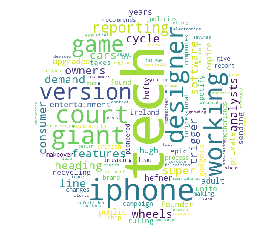

In [66]:

temp_df = news_get_everything('apple' , 'bbc-news')  #always call this very basic dataframe first

# below are the 5 data frames Harvey needs

df_source = get_sources()
df_selected = temp_df[['title', 'url', 'urlToImage', 'sentiment', 'description','date']][0:5] # for table
df_topword = news_top_mentioned(temp_df, 'apple') #  for bar chart
news_create_wordcloud(temp_df, 'apple')  # for wordcloud
df_overallsent = news_overallsentiment(df_selected)   # for pie chart


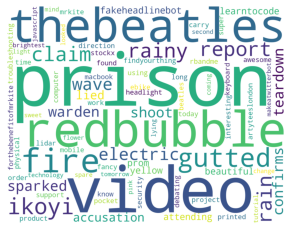

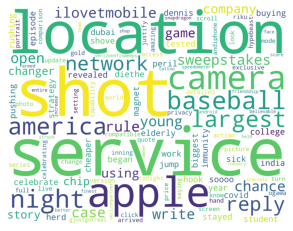

In [121]:
temp_recent = tweet_search('iphone', 'recent')   # always call this basic data frame first
temp_pop = tweet_search('iphone', 'popular')     #always call this basic data frame first


# Below are 8 data frames Harvey needs

tweets_recent = temp_recent[['Tweets', 'Sentiment', 'URL', 'Date']][0:5]    # for table - recent tweets, sentiment, URL and Date
tweets_pop =  temp_pop[['Tweets', 'Sentiment','URL', 'Date']][0:5]        # for table - popular tweets, sentiment, URL and Date



topword_recent = twt_top_mentioned(temp_recent, 'iphone') # for bar chart recent
topword_pop = twt_top_mentioned(temp_pop, 'iphone')  # for bar chart popular

overall_sent_recent= twt_overallsentiment(temp_recent)   # for pie chart recent
overall_sent_pop = twt_overallsentiment(temp_pop)   # for pie chart popular


twt_create_wordcloud(temp_recent,'iphone')  #word cloud recent
twt_create_wordcloud(temp_pop, 'iphone')  # word cloud popular

In [122]:
df_source

,source,source name
0,associated-press,Associated Press
1,australian-financial-review,Australian Financial Review
2,bbc-news,BBC News
3,bloomberg,Bloomberg
4,breitbart-news,Breitbart News
5,business-insider,Business Insider
6,cnn,CNN
7,cbc-news,CBC News
8,financial-post,Financial Post
9,fortune,Fortune


In [67]:
df_selected

,title,url,urlToImage,sentiment,description,date
0,Carmakers compete to keep you entertained,https://www.bbc.co.uk/news/business-54336423,https://ichef.bbci.co.uk/news/1024/branded_news/0D47/production/_114699330_gettyimages-1198592316.jpg,Neutral,"Cars are not software on wheels yet, but the tech is heading that way as owners demand more features.",2020/10/08
1,iPhone 12: Apple makes jump to 5G,https://www.bbc.co.uk/news/technology-54510361,https://ichef.bbci.co.uk/news/1024/branded_news/D4B1/production/_114894445_braodimage.png,Neutral,"Analysts say the new iPhone line-up could trigger a ""super-cycle"" of consumer upgrades.",2020/10/13
2,Playboy goes from private to public in new venture,https://www.bbc.co.uk/news/business-54381937,https://ichef.bbci.co.uk/news/1024/branded_news/0E76/production/_114720730_gettyimages-914010152.jpg,Neutral,The adult entertainment empire is to go public again nine years after founder Hugh Hefner took it private,2020/10/02
3,Apple sues recycling firm that 'resold old gadgets',https://www.bbc.co.uk/news/technology-54419309,https://ichef.bbci.co.uk/news/1024/branded_news/1632F/production/_114772909_gettyimages-455053466.jpg,Neutral,"After sending 500,000 gadgets for recycling, Apple says it found more than 100,000 were still in use.",2020/10/05
4,European Commission to challenge Apple tax bill verdict,https://www.bbc.co.uk/news/technology-54296405,https://ichef.bbci.co.uk/news/1024/branded_news/17933/production/_98136569_apple.logo.close.lit.g.jpg,Neutral,EU court ruling that the tech giant does not have to pay hefty back taxes to Ireland goes back to court.,2020/09/25


In [124]:
df_topword

,word,count
9,iphone,3
3,tech,3
29,court,2
42,designer,2
69,version,2
67,working,2
31,giant,2
64,forward,1
74,refurbished,1
83,england,1


In [125]:
df_overallsent

,Sentiment,Overall Score
0,Positive,0.0
1,Negative,0.0
2,Neutral,100.0


In [126]:
tweets_recent

,Tweets,Sentiment,URL,Date
0,Debating if i should pre order this iphone,Neutral,https://twitter.com/_ScottLaRock_/status/1319384393287348224,2020/10/22
1,Man stockx been had the iPhone 12 up... carry on,Neutral,https://twitter.com/natureboichuck/status/1319384392305905672,2020/10/22
2,Get my art printed on awesome products. Support me at Redbubble #RBandME: #findyourthing #redbubble #mrkite #forthebenefitofmrkite #beatles #thebeatles #TheBeatles #artyteeslondon,Positive,https://twitter.com/ClareJoSamBoo/status/1319384391139942403,2020/10/22
3,New (iPhone) video for today : To the point directions on using &amp; troubleshooting the @ternbicycles eBike headlight.,Positive,https://twitter.com/bikeshopgirlcom/status/1319384390414184448,2020/10/22
4,You know what I want even more than a fancy iPhone 12 LiDAR super computer that fits in my pocket? A physical MacBook Pro keyboard that actually works.🔥⌨️🔥,Positive,https://twitter.com/stew_rtsmith/status/1319384382029910016,2020/10/22


In [127]:
tweets_pop

,Tweets,Sentiment,URL,Date
0,Celebrate baseball's biggest nights with America’s largest 5G Network ⚾️ We’re going to hook 5 fans up with an iPhone 12 Pro with 5G &amp; 1 year of service right now. Reply below with #Sweepstakes and #iLoveTMobile for your chance to win.Rules:,Positive,https://twitter.com/TMobile/status/1319092245039964161,2020/10/22
1,"- The bars stayed open- The college students got sick - Then the elderly got hit … and began to dieThe episode revealed “the perils of pushing a herd-immunity strategy,” @eilperin @brady_dennis @chriscmooney write, as covid jumps from young to old.",Negative,https://twitter.com/ddiamond/status/1319047642509434883,2020/10/21
2,"No, going to Dubai to buy the new iPhone 12 Pro is not cheaper than buying in India. Here is how",Positive,https://twitter.com/OpIndia_com/status/1318880964802564096,2020/10/21
3,Some shots from iPhone 12 Pro 📸,Neutral,https://twitter.com/MKBHD/status/1318656538911887365,2020/10/20
4,Soooo... iPhone 12 MagSafe *does* work with cases?how is @dbrand the only company who tested this? 😂😂😂😂😂😂😂lol at the other companies rushing to shove magnets in their cases so they can write “MagSafe compatible” on the box 😂,Positive,https://twitter.com/jon_prosser/status/1319092072834605060,2020/10/22


In [128]:
topword_recent

,word,count
46,prison,4
16,video,3
63,attending,2
52,wave,2
61,accusation,2
60,shoot,2
59,confirms,2
58,teardown,2
54,warden,2
53,sparked,2


In [129]:
topword_pop

,word,count
39,shot,4
54,location,4
9,service,4
50,apple,3
56,camera,3
98,chip,2
16,open,2
92,changer,2
91,game,2
34,young,2


In [130]:
overall_sent_recent

,Sentiment,Overall Score
0,Positive,33.3
1,Negative,0.0
2,Neutral,66.7


In [131]:
overall_sent_pop

,Sentiment,Overall Score
0,Positive,53.3
1,Negative,13.3
2,Neutral,33.3
